In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
%matplotlib inline

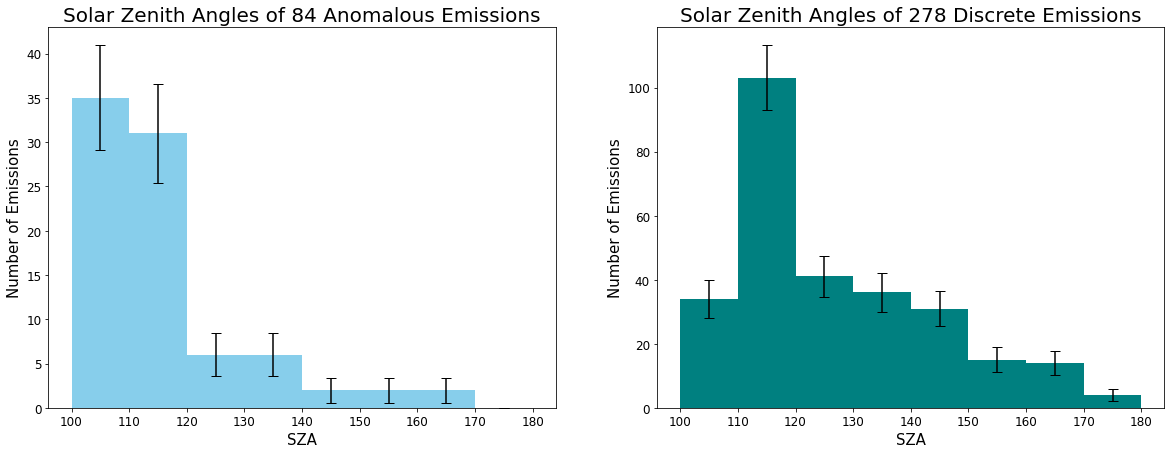

In [26]:
data71 = pd.read_csv('spreadsheets/iuvs_statistical_detections_short_v7.1.csv')
ang = data71['sza']
alldatasza = ang.values
alldiscflag = data71['discrete']
alldiscs = alldiscflag.values
discrete_szas = alldatasza[np.where(alldiscs==1)[0]]
bins=np.arange(100,181,10)
plt.figure(figsize=(20,7))
plt.subplot(121)
a,bine=np.histogram(solza, bins=bins)
plt.title(f'Solar Zenith Angles of {len(solza)} Anomalous Emissions',fontsize=20)
plt.xlabel('SZA',fontsize=15)
plt.ylabel('Number of Emissions',fontsize=15)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(a)
plt.bar(bincenters,a,yerr=std,width=10,capsize=5,color='skyblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(122)
b,bine=np.histogram(discrete_szas, bins=bins)
plt.title(f'Solar Zenith Angles of {len(discrete_szas)} Discrete Emissions',fontsize=20)
plt.xlabel('SZA',fontsize=15)
plt.ylabel('Number of Emissions',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=10,capsize=5,color='teal');

In [29]:
data=pd.read_csv('spreadsheets/master_set.csv')
lat=data['latitude']
latitude=lat.values
bestratios = data['select_ratio']
bestrats = bestratios.values

In [30]:
data2=pd.read_csv('spreadsheets/excluded_and_short_updated.csv')
lat2=data2['latitude']
lall=lat2.values
rat = data2['CO/CO2p']
ratios = rat.values
discrete = data2['discrete']
disc = discrete.values
discratios = ratios[np.where(disc==1)[0]]
orbitnums = data2['orbit_number']
allorbs = orbitnums.values
scannums = data2['scan']
allscans = scannums.values

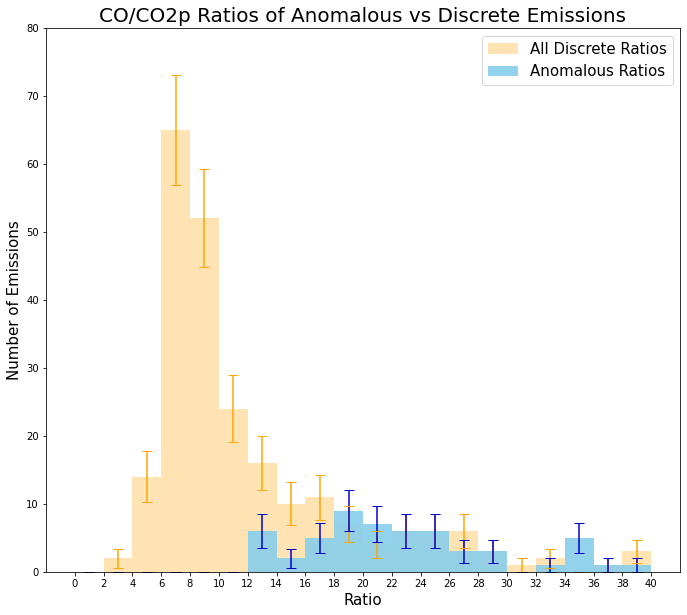

In [32]:
%matplotlib inline
bins=np.arange(0,42,2)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
y,binedge=np.histogram((discratios),bins=bins)
z,binedge2=np.histogram((bestrats),bins=bins)
plt.xticks(bins)
plt.ylim(0,80)
bincenters1=0.5*(binedge[1:]+binedge[:-1])
bincenters2=0.5*(binedge2[1:]+binedge2[:-1])
std=np.sqrt(y)
std2=np.sqrt(z)
plt.bar(bincenters1,y,yerr=std,width=2,capsize=5,color='orange',label='All Discrete Ratios',alpha=0.3,ecolor='orange')
plt.bar(bincenters2,z,yerr=std2,width=2,capsize=5,color='skyblue',label='Anomalous Ratios',alpha=0.9,ecolor='mediumblue')
plt.title("CO/CO2p Ratios of Anomalous vs Discrete Emissions", fontsize=20)
plt.xlabel('Ratio',fontsize=15)
plt.ylabel('Number of Emissions',fontsize=15)
plt.legend(fontsize=15)

In [33]:
o = [[],[]]
for i in range(len(ratios)):
    if disc[i]==1 and 28<ratios[i] and 42>ratios[i]:
        o[0].append(allorbs[i])
        o[1].append(allscans[i])

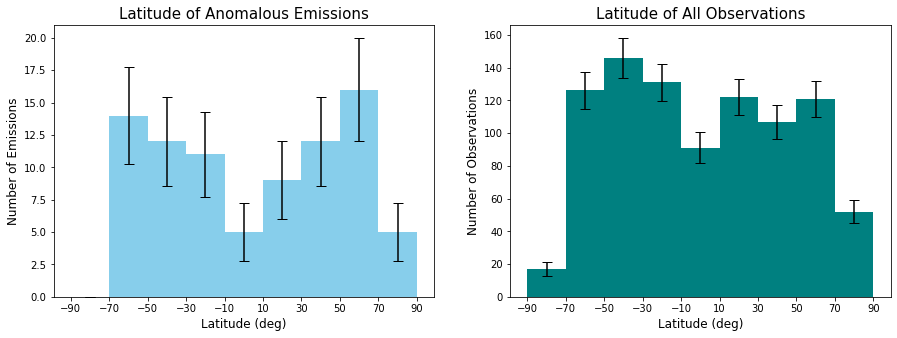

In [35]:
bins=np.arange(-90,91,20)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
b,bine=np.histogram(latitude,bins=bins)
plt.xticks(bins)
plt.title("Latitude of Anomalous Emissions",fontsize=15)
plt.xlabel('Latitude (deg)',fontsize=12)
plt.ylabel('Number of Emissions',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=20,capsize=5,color='skyblue')
plt.subplot(1,2,2)
b,bine=np.histogram(lall,bins=bins)
plt.xticks(bins)
plt.title("Latitude of All Observations",fontsize=15)
plt.xlabel('Latitude (deg)',fontsize=12)
plt.ylabel('Number of Observations',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=20,capsize=5,color='teal');

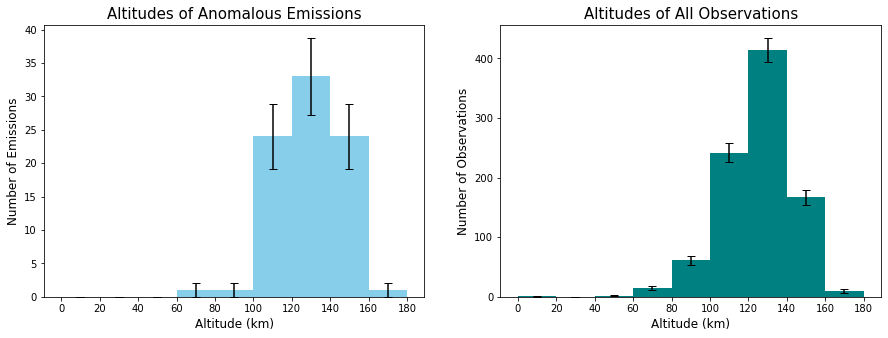

In [36]:
bins=np.arange(0,181,20)
alt=data['altitude']
altitude=alt.values
alt2=data2['altitude']
altitude2=alt2.values
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(altitude, bins=bins,color='mediumaquamarine')
b,bine=np.histogram(altitude,bins=bins)
plt.title("Altitudes of Anomalous Emissions",fontsize=15)
plt.xticks(bins)
plt.xlabel('Altitude (km)',fontsize=12)
plt.ylabel('Number of Emissions',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=20,capsize=4,color='skyblue')
plt.subplot(1,2,2)
b,bine=np.histogram(altitude2, bins=bins)
plt.title("Altitudes of All Observations",fontsize=15)
plt.xticks(bins)
plt.xlabel('Altitude (km)',fontsize=12)
plt.ylabel('Number of Observations',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=20,capsize=4,color='teal');

In [38]:
loc=data['local_time']
local=loc.values
loc2=data2['local_time']
local2=loc2.values
newloc=[]
newloc2=[]
for i in range(len(local)):
    if local[i]>=12:
        newloc.append(local[i]-24)
    else:
        newloc.append(local[i])
for i in range(len(local2)):
    if local2[i]>=12:
        newloc2.append(local2[i]-24)
    else:
        newloc2.append(local2[i])


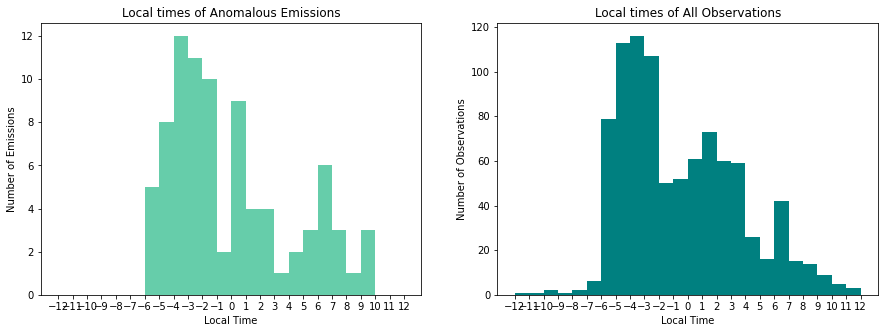

In [39]:
bins=np.arange(-12,13,1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(newloc,bins=bins,color='mediumaquamarine')
plt.xticks(bins)
plt.title("Local times of Anomalous Emissions")
plt.xlabel('Local Time')
plt.ylabel('Number of Emissions')
plt.subplot(1,2,2)
plt.hist(newloc2,color='teal',bins=bins)
plt.xticks(bins)
plt.title("Local times of All Observations")
plt.xlabel('Local Time')
plt.ylabel('Number of Observations');

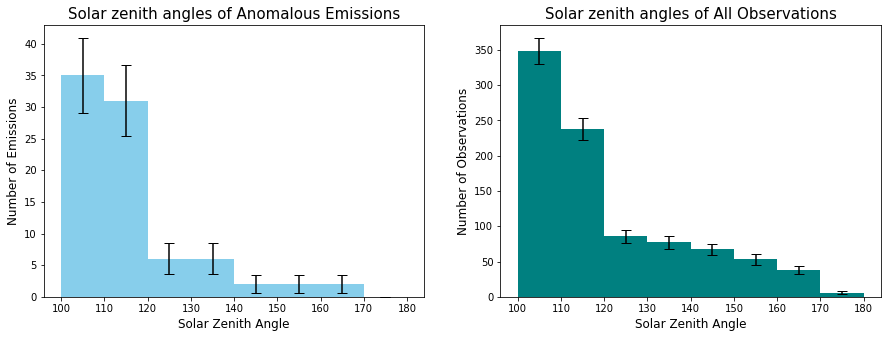

In [40]:
bins=np.arange(100,181,10)
sza=data['sza']
solza=sza.values
sza2=data2['sza']
sol2=sza2.values
f=plt.figure(figsize=(15,5))
plt.subplot(121)
b,bine=np.histogram(solza, bins=bins)
plt.xticks(bins)
#plt.yticks(np.arange(0,19,2))
plt.title("Solar zenith angles of Anomalous Emissions",fontsize=15)
plt.xlabel('Solar Zenith Angle',fontsize=12)
plt.ylabel('Number of Emissions',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=10,capsize=5,color='skyblue')
plt.subplot(1,2,2)
b,bine=np.histogram(sol2,bins=bins)
plt.xticks(bins)
plt.title("Solar zenith angles of All Observations",fontsize=15)
plt.xlabel('Solar Zenith Angle',fontsize=12)
plt.ylabel('Number of Observations',fontsize=12)
bincenters=0.5*(bine[1:]+bine[:-1])
std=np.sqrt(b)
plt.bar(bincenters,b,yerr=std,width=10,capsize=5,color='teal');

#### Normalized Histograms

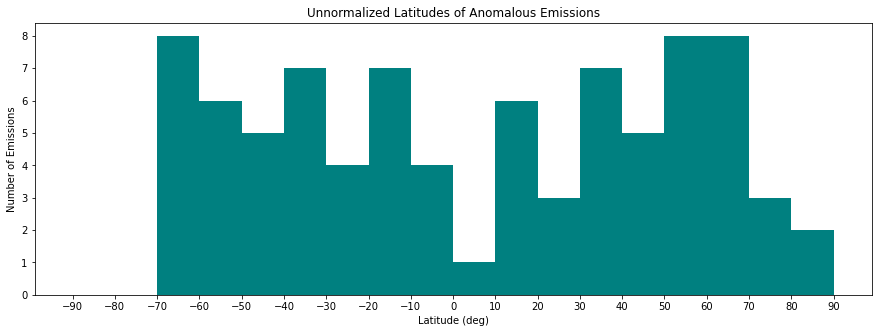

In [41]:
bins=np.arange(-90,91,10)
plt.figure(figsize=(15,5))
counts = plt.hist(latitude,bins=bins,color='teal')
plt.xticks(bins)
plt.title("Unnormalized Latitudes of Anomalous Emissions")
plt.xlabel('Latitude (deg)')
plt.ylabel('Number of Emissions');

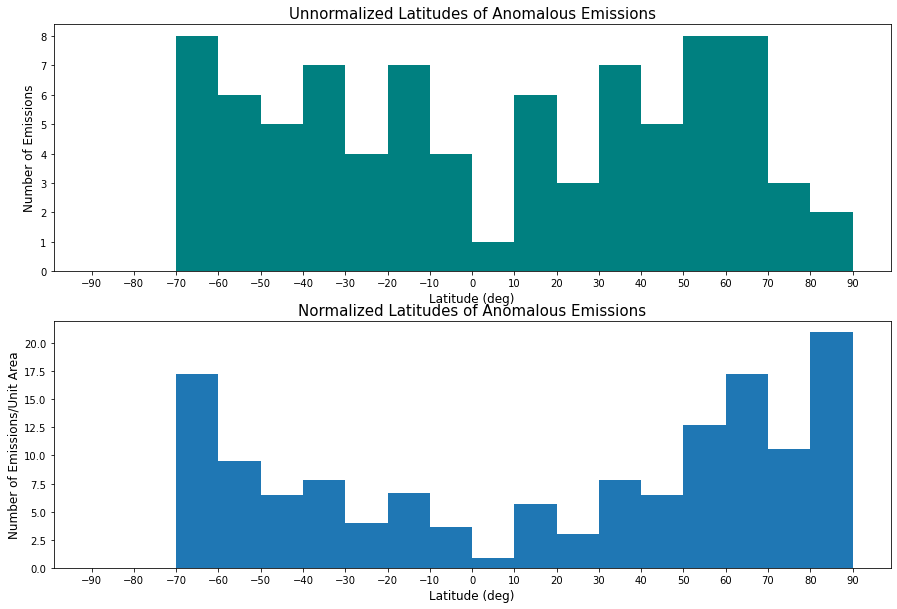

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
counts = plt.hist(latitude,bins=bins,color='teal')
plt.xticks(bins)
plt.title("Unnormalized Latitudes of Anomalous Emissions",fontsize=15)
plt.xlabel('Latitude (deg)',fontsize=12)
plt.ylabel('Number of Emissions',fontsize=12)

increment = np.pi/180*np.arange(-90,91,10)
normlats = []
for i in range(1,len(increment)):
    normlats.append(2*np.pi*(np.sin(increment[i])-np.sin(increment[i-1])))
normlats = np.array(normlats)
plt.subplot(2,1,2)
plt.bar(np.arange(-85,86,10),counts[0]/normlats, width=10)
plt.xticks(bins)
plt.title("Normalized Latitudes of Anomalous Emissions",fontsize=15)
plt.xlabel('Latitude (deg)',fontsize=12)
plt.ylabel('Number of Emissions/Unit Area',fontsize=12);

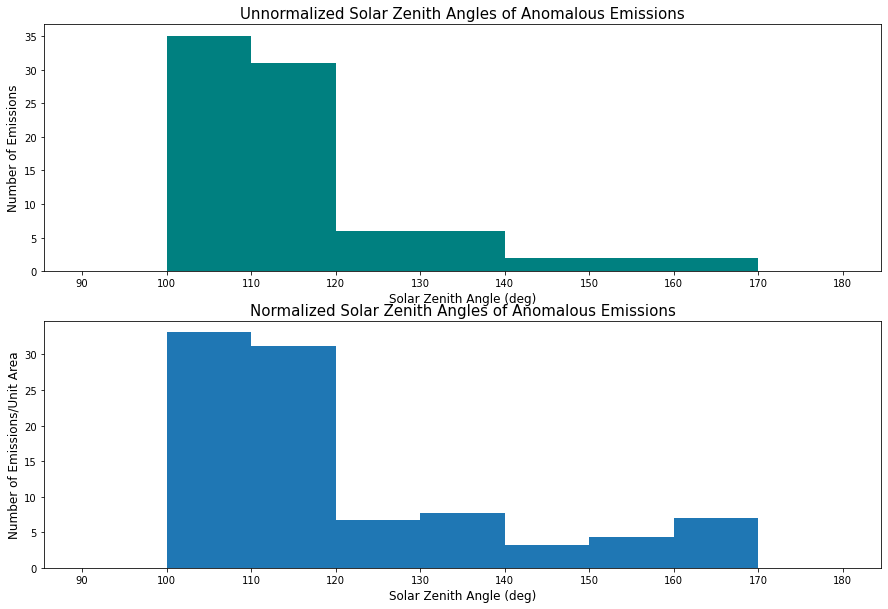

In [43]:
%matplotlib inline
bins=np.arange(90,181,10)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
counts = plt.hist(solza,bins=bins,color='teal')
plt.xticks(bins)
plt.title("Unnormalized Solar Zenith Angles of Anomalous Emissions", fontsize=15)
plt.xlabel('Solar Zenith Angle (deg)',fontsize=12)
plt.ylabel('Number of Emissions',fontsize=12)

plt.subplot(2,1,2)
plt.bar(np.arange(95,176,10),counts[0]/normlats[9:18], width=10)
plt.xticks(bins)
plt.title("Normalized Solar Zenith Angles of Anomalous Emissions",fontsize=15)
plt.xlabel('Solar Zenith Angle (deg)',fontsize=12)
plt.ylabel('Number of Emissions/Unit Area',fontsize=12);

In [45]:
l_s=data['L_s']
ls1=l_s.values
ls2 = (ls1/2)-90

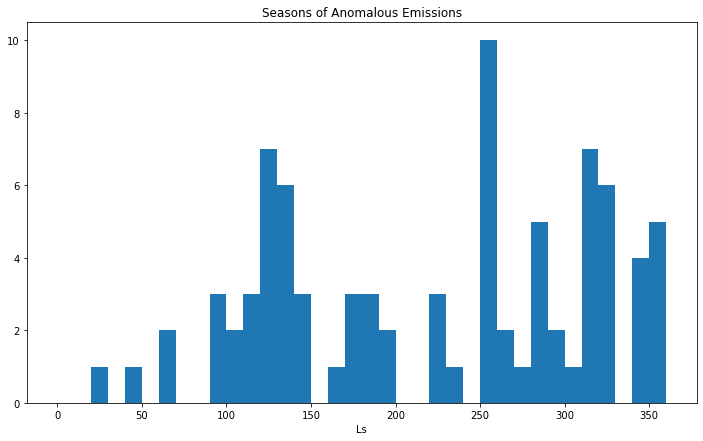

In [46]:
%matplotlib inline
plt.figure(figsize=(12,7))
plt.hist(ls1,bins=np.arange(0,361,10))
plt.title('Seasons of Anomalous Emissions')
plt.xlabel('Ls');

In [47]:
discdata =pd.read_csv('spreadsheets/iuvs_statistical_detections_short_v7.1.csv')
loc=discdata['local_time']
local=loc.values
newlocs=[]
for i in range(len(local)):
    if local[i]>=12:
        newlocs.append(local[i]-24)
    else:
        newlocs.append(local[i])
lat=discdata['latitude']
latitudes=lat.values

In [48]:
r=10
theta = np.array(newloc)*((2*np.pi)/24)+(np.pi/2)
phi = (90-latitude)*np.pi/180

In [49]:
x = (r*np.sin(phi) *np.cos(theta))
y = (r*np.sin(phi)*np.sin(theta))
z = (r*np.cos(phi))
phii, thetaa = np.mgrid[0.0:np.pi/2:30j, 0.0:2.0*np.pi:30j]
phi2, theta2 = np.mgrid[0.0:np.pi:14j, 0.0:2.0*np.pi:14j]
xx = r*np.sin(phi2)*np.cos(theta2)
yy = (r*np.sin(phi2)*np.sin(theta2))
zz = (r*np.cos(phi2))

In [50]:
rs = []
xs = []
ys = []
angles = [100,120,140,160]
#angles = np.arange(90,180,5)
t = np.arange(0,2.1*np.pi,0.1)
for i in range(len(angles)):
    rs.append(np.sin(np.pi*angles[i]/180)*r)
    xs.append(rs[i]*np.cos(t))
    ys.append(rs[i]*np.sin(t))

In [51]:
l_s=data['L_s']
ls=l_s.values

In [52]:
long=data['longitude']
longitude=long.values

<ipython-input-54-6fde70abef38>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  mag_cmap.set_bad((1, 1, 1))


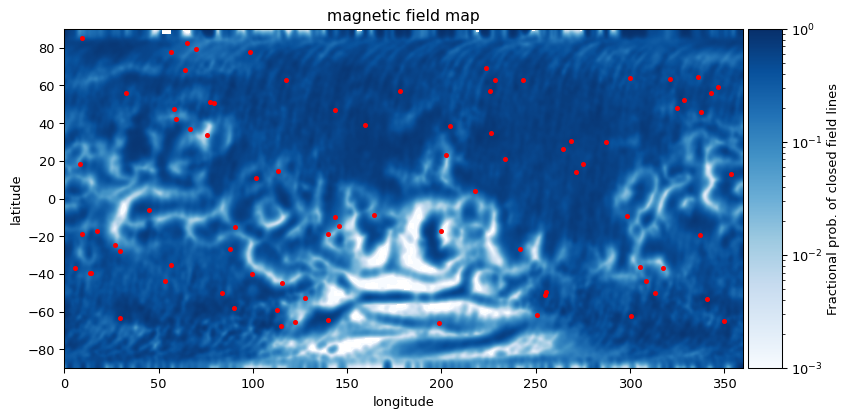

In [54]:
%matplotlib inline
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
map_img = np.load('bfield_smoothed.npy')
mag_cmap = plt.get_cmap('Blues')
mag_cmap.set_bad((1, 1, 1))
fig = plt.figure(figsize=(20,10), dpi=94) #Create the main figure
sh = (4,8) #create the shape of the figure, rows and columns
ax3 = plt.subplot2grid(sh, (2, 0), colspan=5, rowspan=2)
im = ax3.imshow(map_img, cmap=mag_cmap, norm=colors.LogNorm(vmin=0.001, vmax=1), extent=[0, 360, -90, 90], origin='lower')
ax4 = plt.gca()
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
cba = plt.colorbar(im, cax=cax)
cba.set_label('Fractional prob. of closed field lines', rotation=90)
ax3.set_xlabel('longitude')
ax3.set_ylabel('latitude')
ax3.set_title('magnetic field map')
ax3.scatter(longitude,latitude,color='red',s=8);

In [65]:
best=pd.read_csv('spreadsheets/master_set.csv')
orbs = best['orbit_number']
scns = best['scan']
szas = best['sza']

Text(0.5, 1.0, 'Dataset of excluded detections')

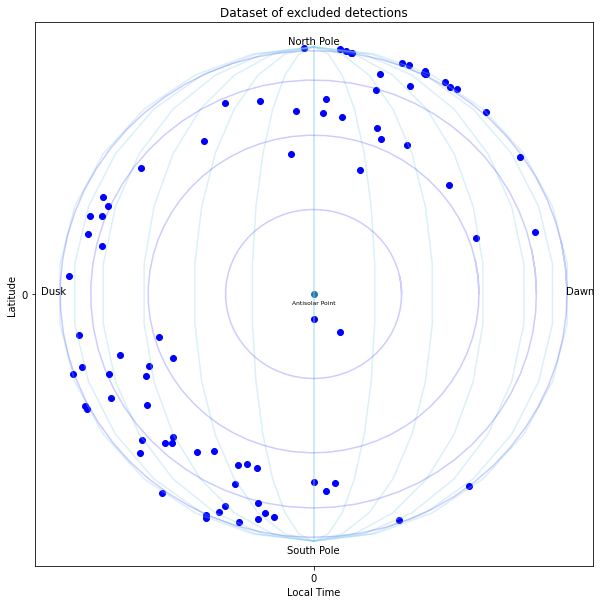

In [66]:
#%matplotlib qt
fig = plt.figure(figsize=(10,10))
plt.scatter(-x,z,color='blue')
plt.plot(yy,zz,color='skyblue',alpha=0.3)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],c='blue',alpha=0.2)
#for i in range(len(z)):
 #   plt.text(-x[i],z[i],s=str(orbs[i]),color='black',size=4,rotation=45)
plt.xticks(np.arange(0,10,10))
plt.xlabel('Local Time')
plt.yticks(np.arange(0,10,10))
plt.ylabel('Latitude');
plt.text(0,10.1,'North Pole',horizontalalignment='center')
plt.text(0,-10.5,'South Pole',horizontalalignment='center')
plt.text(9.8,0,'Dawn')
plt.text(-10.6,0,'Dusk')
plt.scatter(0,0)
plt.text(0,-.4,'Antisolar Point',horizontalalignment='center',fontsize=6)
plt.title('Dataset of excluded detections')
#plt.text(3,-2.5,'160',horizontalalignment='center')
#plt.text(5.25,-4.5,'140',horizontalalignment='center')
#plt.text(7,-6,'120',horizontalalignment='center')
#plt.text(7.75,-6.75,'100',horizontalalignment='center')
#plt.savefig('correctglob.pdf');
#plt.set_aspect('equal');

In [67]:
szas

0     104.6
1     139.9
2     109.2
3     113.1
4     107.8
      ...  
79    126.3
80    114.3
81    113.2
82    108.2
83    114.9
Name: sza, Length: 84, dtype: float64

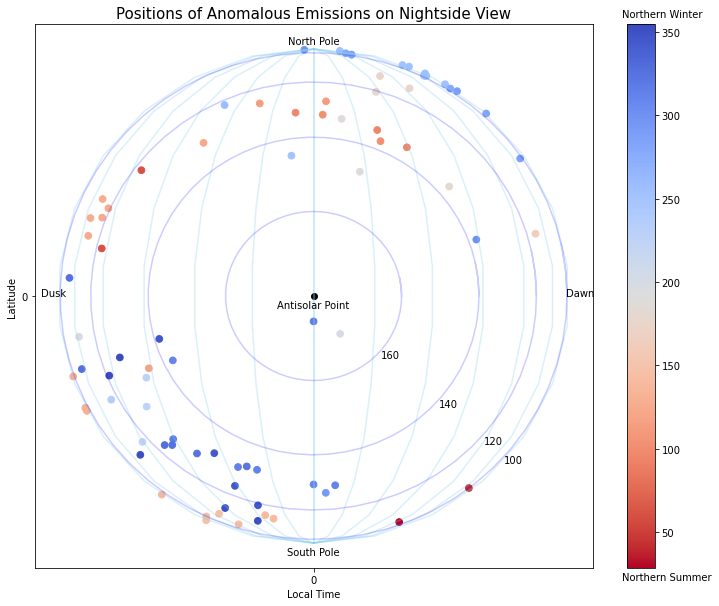

In [68]:
%matplotlib inline
fig = plt.figure(figsize=(12.5,10))
plt.scatter(-x,z,c=ls,cmap=cm.coolwarm_r,s=45)
plt.plot(yy,zz,color='skyblue',alpha=0.3)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],c='blue',alpha=0.2)
#for i in range(len(z)):
 #   plt.text(-x[i],z[i],s=str(orbs[i]),color='black',size=8,rotation=45)
#+', '+str(np.round(szas[i],1))
plt.xticks(np.arange(0,10,10))
plt.xlabel('Local Time')
plt.yticks(np.arange(0,10,10))
plt.ylabel('Latitude');
plt.text(0,10.2,'North Pole',horizontalalignment='center')
plt.text(0,-10.5,'South Pole',horizontalalignment='center')
plt.text(9.8,0,'Dawn')
plt.text(-10.6,0,'Dusk')
plt.text(3,-2.5,'160',horizontalalignment='center')
plt.text(5.25,-4.5,'140',horizontalalignment='center')
plt.text(7,-6,'120',horizontalalignment='center')
plt.text(7.75,-6.75,'100',horizontalalignment='center')
plt.colorbar()
plt.scatter(0,0,c='black')
plt.text(0,-.5,'Antisolar Point',horizontalalignment='center',fontsize=10)
plt.title('Positions of Anomalous Emissions on Nightside View',fontsize=15)
plt.text(12,11.3,'Northern Winter')
plt.text(12,-11.5,'Northern Summer')
plt.savefig('global.jpg');
#plt.set_aspect('equal');

In [69]:
%matplotlib qt
fig = plt.figure(figsize=(12.5,10))
plt.scatter(-x,z,c=szas,cmap=cm.inferno)
plt.plot(yy,zz,color='skyblue',alpha=0.3)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],c='blue',alpha=0.2)
for i in range(len(z)):
    plt.text(-x[i],z[i],s=str(orbs[i]),color='black',size=4,rotation=45)
#+', '+str(np.round(szas[i],1))
plt.xticks(np.arange(0,10,10))
plt.xlabel('Local Time')
plt.yticks(np.arange(0,10,10))
plt.ylabel('Latitude');
plt.text(0,10.1,'North Pole',horizontalalignment='center')
plt.text(0,-10.5,'South Pole',horizontalalignment='center')
plt.text(9.8,0,'Dawn')
plt.text(-10.6,0,'Dusk')
plt.text(3,-2.5,'160',horizontalalignment='center')
plt.text(5.25,-4.5,'140',horizontalalignment='center')
plt.text(7,-6,'120',horizontalalignment='center')
plt.text(7.75,-6.75,'100',horizontalalignment='center')
plt.colorbar();
#plt.savefig('global_sza_colored.pdf');
#plt.set_aspect('equal');

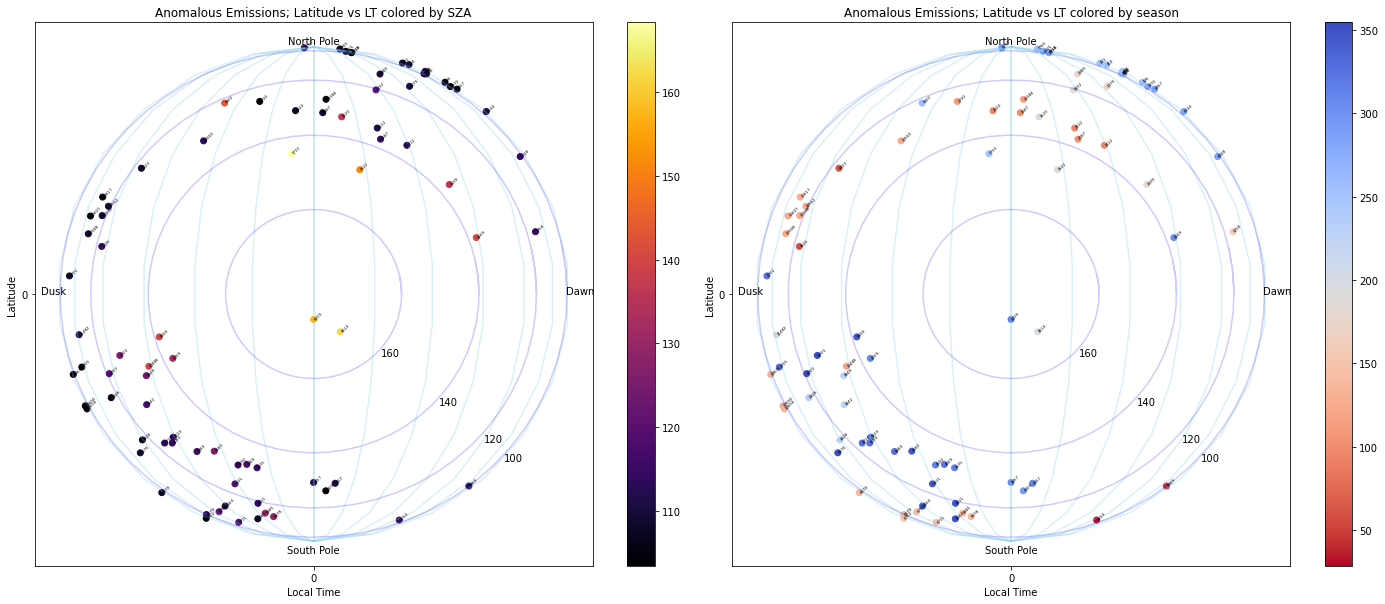

In [70]:
%matplotlib inline
fig = plt.figure(figsize=(25,10))
fig.subplots_adjust(wspace=0.0)
plt.subplot(1,2,1)
plt.scatter(-x,z,c=szas,cmap=cm.inferno)
plt.plot(yy,zz,color='skyblue',alpha=0.3)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],c='blue',alpha=0.2)
for i in range(len(z)):
    plt.text(-x[i],z[i],s=str(orbs[i]),color='black',size=4,rotation=45)
#+', '+str(np.round(szas[i],1))
plt.xticks(np.arange(0,10,10))
plt.xlabel('Local Time')
plt.yticks(np.arange(0,10,10))
plt.ylabel('Latitude');
plt.text(0,10.1,'North Pole',horizontalalignment='center')
plt.text(0,-10.5,'South Pole',horizontalalignment='center')
plt.text(9.8,0,'Dawn')
plt.text(-10.6,0,'Dusk')
plt.text(3,-2.5,'160',horizontalalignment='center')
plt.text(5.25,-4.5,'140',horizontalalignment='center')
plt.text(7,-6,'120',horizontalalignment='center')
plt.text(7.75,-6.75,'100',horizontalalignment='center')
plt.title('Anomalous Emissions; Latitude vs LT colored by SZA')
plt.colorbar()
plt.subplot(1,2,2)
#fig = plt.figure(figsize=(12.5,10))
plt.scatter(-x,z,c=ls,cmap=cm.coolwarm_r)
plt.plot(yy,zz,color='skyblue',alpha=0.3)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],c='blue',alpha=0.2)
for i in range(len(z)):
    plt.text(-x[i],z[i],s=str(orbs[i]),color='black',size=4,rotation=45)
#+', '+str(np.round(szas[i],1))
plt.xticks(np.arange(0,10,10))
plt.xlabel('Local Time')
plt.yticks(np.arange(0,10,10))
plt.ylabel('Latitude');
plt.text(0,10.1,'North Pole',horizontalalignment='center')
plt.text(0,-10.5,'South Pole',horizontalalignment='center')
plt.text(9.8,0,'Dawn')
plt.text(-10.6,0,'Dusk')
plt.text(3,-2.5,'160',horizontalalignment='center')
plt.text(5.25,-4.5,'140',horizontalalignment='center')
plt.text(7,-6,'120',horizontalalignment='center')
plt.text(7.75,-6.75,'100',horizontalalignment='center')
plt.title('Anomalous Emissions; Latitude vs LT colored by season')
plt.colorbar();
#plt.savefig('both_globals.pdf');